# Example 10.1 (pag 454)

In [1]:
import statsmodels.api as sm
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

TABS_DIR = Path("../tests/data")

df = pd.read_csv(TABS_DIR / "tab_10_2.csv")
df.head(3)

,Temperature (degC),Rate (lb/h),Viscosity
0,80,8,2256
1,93,9,2340
2,100,10,2426


In [2]:
x = sm.add_constant(df[['Temperature (degC)','Rate (lb/h)']]) # Add a column of ones to an array.
y = df['Viscosity']
model = sm.OLS(y,x)
res = model.fit()

In [3]:
res.summary()

/Users/danieleongari/opt/anaconda3/envs/pydoe/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Viscosity   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     82.50
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           4.10e-08
Time:                        20:01:32   Log-Likelihood:                -65.758
No. Observations:                  16   AIC:                             137.5
Df Residuals:                      13   BIC:                             139.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1566.0778     61.592     25.427      0.000    1433.017    1699.139
Temperature (degC)     7.6213      0.618     12.324      0.000       6.285       8.957
Rate (lb/h)            8.5848      2.439      3.520      0.004       3.316      13.853
==============================================================================
Omnibus:                        1.215   Durbin-Watson:                   2.607
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                0.779
Skew:                          -0.004   Prob(JB):                        0.677
Kurtosis:                       1.919   Cond. No.                     1.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1
eval_env: 1
eval_env: 1


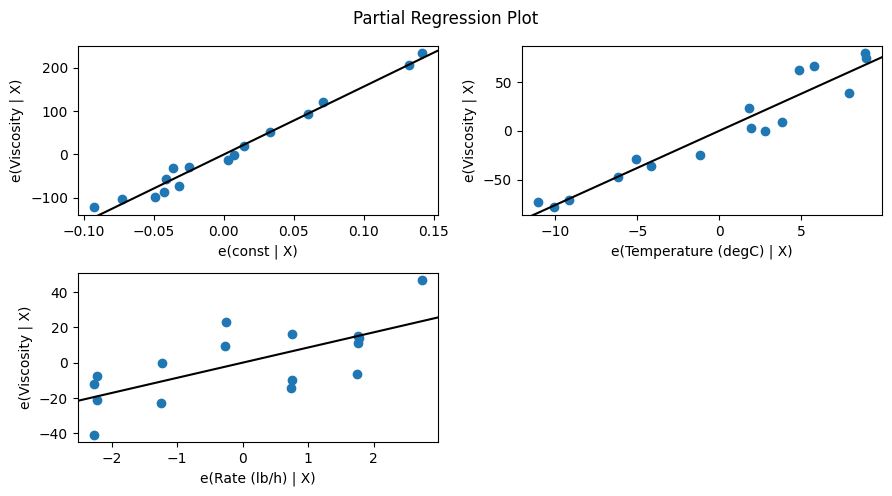

In [4]:
fig = plt.figure(figsize=[9,5], dpi=100)
sm.graphics.plot_partregress_grid(res, fig=fig)
fig.tight_layout(pad=1)

## Analysis of residuals

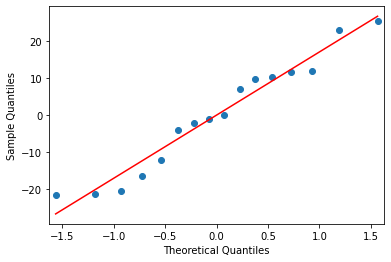

In [5]:
pplot = sm.ProbPlot(res.resid)
fig = pplot.qqplot(line='r') # Compare with Fig 10.1 (xy swapped, "quantiles" instead of "percent")

eval_env: 1


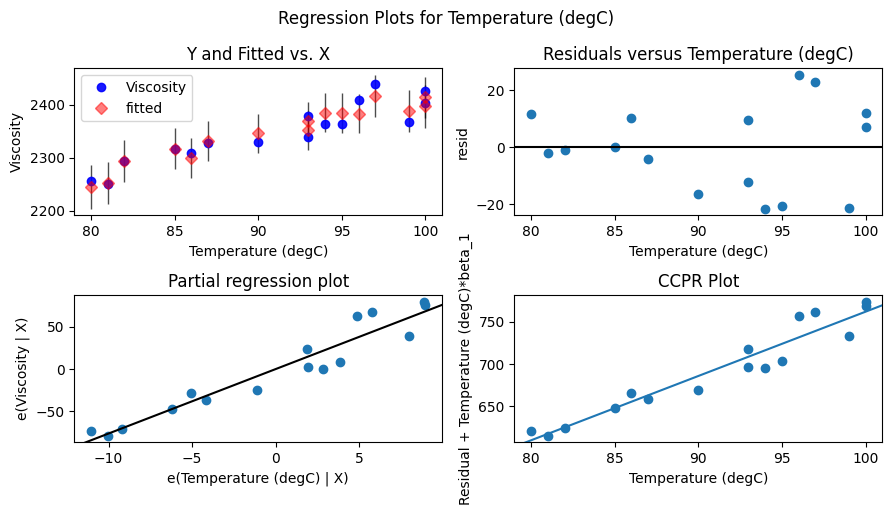

eval_env: 1


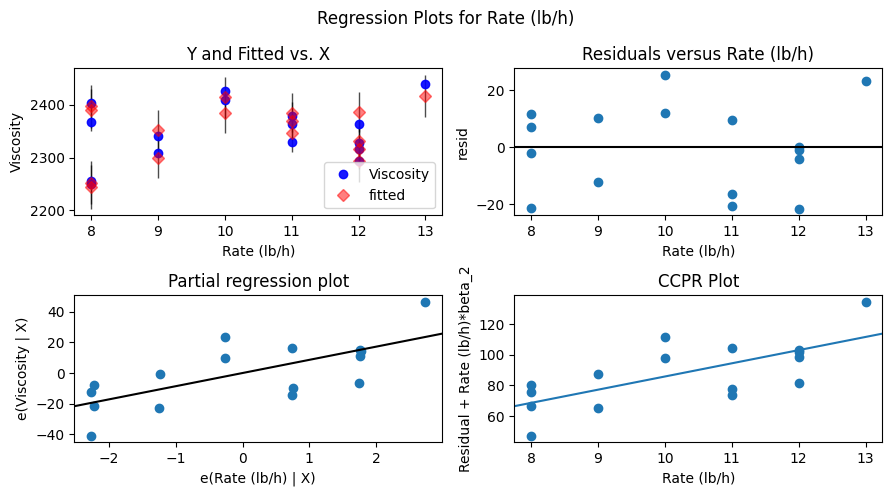

In [6]:
for var in ['Temperature (degC)','Rate (lb/h)']:
    fig = plt.figure(figsize=[9,5], dpi=100)
    sm.graphics.plot_regress_exog(res, var, fig=fig)
    fig.tight_layout(pad=1.0)
    plt.show()

## Build Table 10.3

In [7]:
from statsmodels.stats.outliers_influence import OLSInfluence
resinf = OLSInfluence(res)

In [8]:
tab = {
    "Observation": range(1, len(df)+1),
    "y": df['Viscosity'],
    "Predicted y": res.predict(),
    "Residual": res.resid,
    "h_ii": resinf.hat_matrix_diag,
    "Studentized Residual": resinf.resid_studentized_internal,
    "Di": resinf.cooks_distance[0],
    "R-Student": resinf.resid_studentized_external
}
tab10_3 = pd.DataFrame.from_dict(tab)
tab10_3 = tab10_3.set_index("Observation")
tab10_3.head(3)


,y,Predicted y,Residual,h_ii,Studentized Residual,Di,R-Student
Observation,,,,,,,
1,2256,2244.459745,11.540255,0.349507,0.874677,0.137021,0.866239
2,2340,2352.121362,-12.121362,0.102472,-0.782134,0.023281,-0.769780
3,2426,2414.055238,11.944762,0.176671,0.804720,0.046319,0.793157
